In [14]:
import pandas as pd
import matplotlib.pyplot as plt

matches = pd.read_csv(r"C:\Users\hp\Favorites\Downloads\matches.csv")
deliveries = pd.read_csv(r"C:\Users\hp\Favorites\Downloads\deliveries.csv")

matches.head(),deliveries.head()


(       id   season        city        date match_type player_of_match  \
 0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
 1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
 2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
 3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
 4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \


In [15]:
matches.info()
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

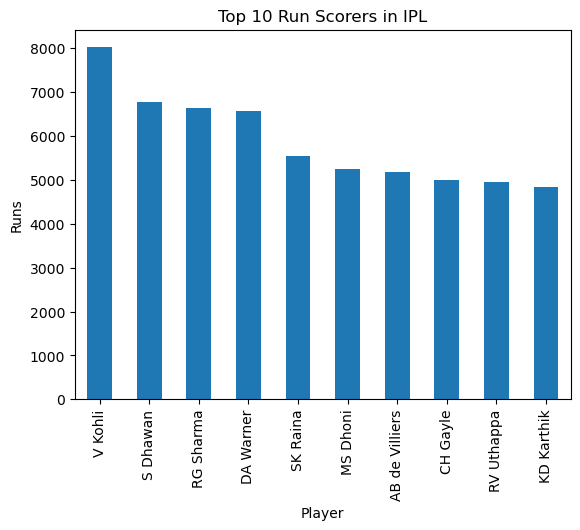

In [16]:
top_scorers = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

top_scorers.plot(kind="bar")
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Player")
plt.ylabel("Runs")
plt.show()


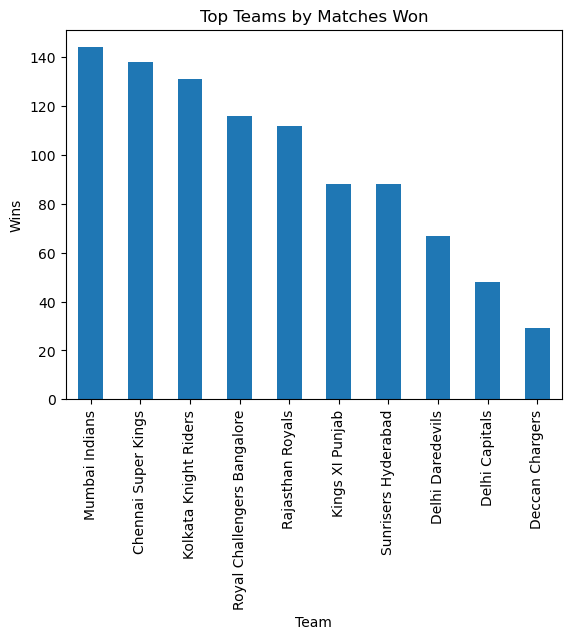

In [17]:
team_wins = matches["winner"].value_counts().head(10)

team_wins.plot(kind="bar")
plt.title("Top Teams by Matches Won")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


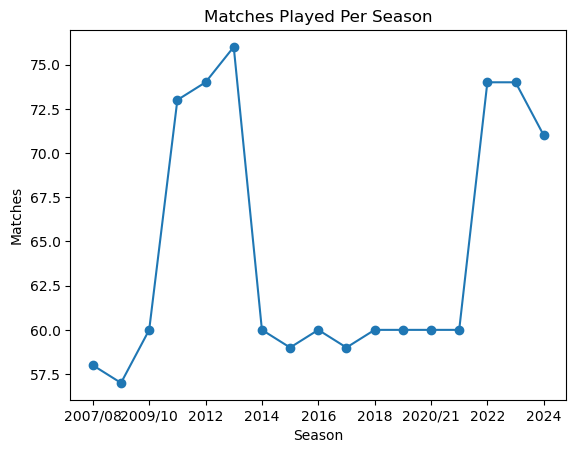

In [18]:
season_matches = matches["season"].value_counts().sort_index()

season_matches.plot(marker="o")
plt.title("Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()


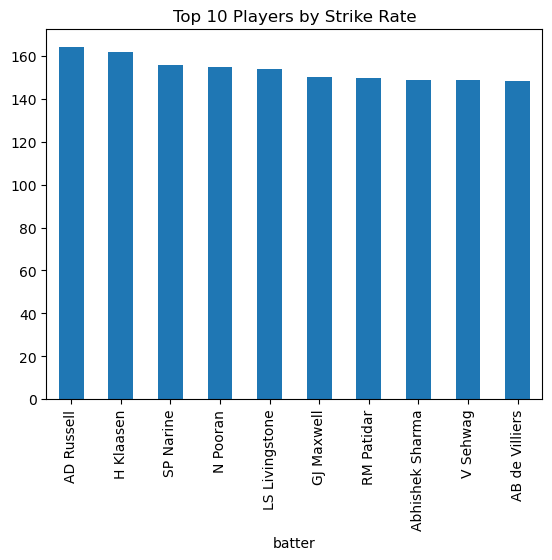

In [19]:
player_stats = deliveries.groupby("batter").agg({
    "batsman_runs": "sum",
    "ball": "count"
})

player_stats["strike_rate"] = (player_stats["batsman_runs"] / player_stats["ball"]) * 100

top_strike_rate = player_stats[player_stats["ball"] > 500].sort_values(
    by="strike_rate", ascending=False
).head(10)

top_strike_rate["strike_rate"].plot(kind="bar")
plt.title("Top 10 Players by Strike Rate")
plt.show()
